# Polynomial Regression
This file contains regression methodes: lineair regression on timeseries and polynomial regression on climate features vs production values. If you have no experience with Jupyter Notebook or Python, part of the results can be found [here](https://readmees.github.io/polynomial_fit.html).

# Import and preprocces data
To run this file you can press on 'Cell' and then on 'Run Cells'. You'll be asked multiple times to give input, this way you'll be able use the data in multiple ways. If you have more data in the future, you can add them in the same directory as the one with the Automonous Greenhouse Challenge teams. You can add new data by making a new directory. This directory needs to contain five csv files: Greenhouse_climate.csv, CropManagement.csv, Irrigation.csv, Production.csv and vip.csv. To run this specific code it's usefull to have the same features as the ones of the greenhouse challenge (see the data/DataReadMe.pdf file).

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize as minimize
from scipy.signal import find_peaks

# Import helper functions from polynomial_fit.py.
from polynomial_fit import *

In [2]:
# Loads in all the data in the data repository, except for the readme.
FileNotFound = True
while FileNotFound:
    try:
        directory = "data"
        datasets = [filename for filename in os.listdir(directory)]
        FileNotFound = False
    except FileNotFoundError:
        print("Please add a valid directory")
        FileNotFound = True

datasets.remove('DataReadMe.pdf')

In [3]:
# Creates Python dictionaries to be able to access all the different datasets.
data = {}
for dataset in datasets:
    GHClim = pd.read_csv(f"data/{dataset}/Greenhouse_climate.csv") 
    Crop = pd.read_csv(f"data/{dataset}/CropManagement.csv") 
    irri = pd.read_csv(f"data/{dataset}/Irrigation.csv") 
    prod = pd.read_csv(f"data/{dataset}/Production.csv") 
    vip = pd.read_csv(f"data/{dataset}/vip.csv") 
    GHClim = GHClim.drop(['VentLee', 'Ventwind', 'AssimLight', 'BlackScr', 'EnScr'], axis=1)

    # Fills all the NaN values except the ones in the first row.
    GHClim.fillna(method='ffill', inplace=True)
    Crop.fillna(method='ffill', inplace=True)
    irri.fillna(method='ffill', inplace=True)
    prod.fillna(method='ffill', inplace=True)
    vip.fillna(method='ffill', inplace=True)
    
    # Fills all the possible skipped NaN values.
    GHClim.fillna(method='bfill', inplace=True)
    Crop.fillna(method='bfill', inplace=True)
    irri.fillna(method='bfill', inplace=True)
    prod.fillna(method='bfill', inplace=True)
    vip.fillna(method='bfill', inplace=True)
    data[dataset] = {'GHClim':GHClim, 'Crop':Crop, 'irri':irri, 'prod':prod, 'vip':vip}

In [17]:
# Feature information is retrieved from the ReadMe.pdf from 
# the Automonous greenhouse challenge.
features_ghclim = {'Tair': ['Air temperature greenhouse', '°C'],
'RHair': ['Relative humidity greenhouse', '%'],
'CO2air': ['CO2 greenhouse', 'ppm'],
'HumDef': ['Humidity deficit', 'g/m3'],
'PipeLow': ['Lower circuit Temperature', '°C'],
'PipeGrow': ['Growth circuit Temperature', '°C']}

features_vip = {'CO2_Vip': ['CO2 setpoint', 'ppm'],
'HumDef_Vip': ['humidity deficit setpoint', 'g/kg'],
'MinPipeLow_Vip': ['net pipe minimum temperature setpoint', '°C'],
'MinPipeGrow_Vip': ['crop pipe minimum temperature setpoint', '°C']}

# Data visualization
Lets show how the features change with time.

First of all a demonstration of the visualization of a single team/dataset, by default the Croperators. Since a lot of datapoint are the same for the teams, it's not always clear if there's only one datapoint measured or multiple. If you look closer, the points where multiple datapoints are measured are bigger points. This is not that user-friendly, which is why the regression line is added (which of course takes all datapoints into account).

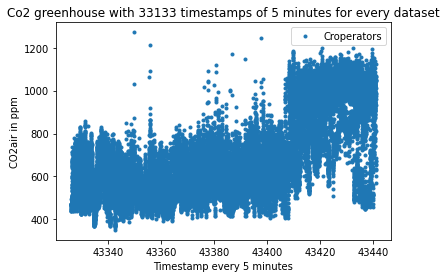

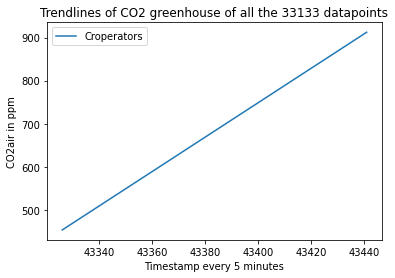

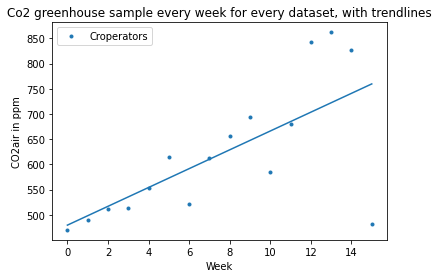

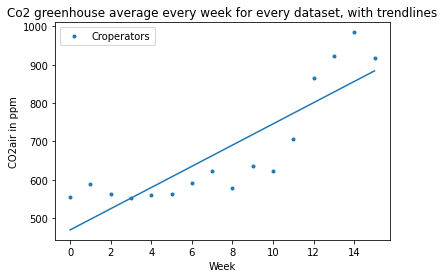

In [5]:
# Visualizes all the CO2air values over time for the Croperatures team.
key = 'CO2air'
visualize_time(['Croperators'], key, features_ghclim[key][0], f'{key} in {features_ghclim[key][1]}')

## Greenhouse climate
The next visualisations will be of the GHClim dataset.

*Column heading Parameter description Unit Interval Dataset name Type Comments Data collection*
![](https://imgur.com/iAl45aq.png)

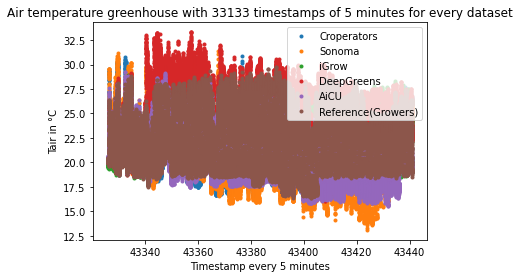

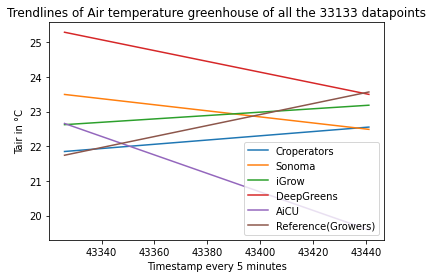

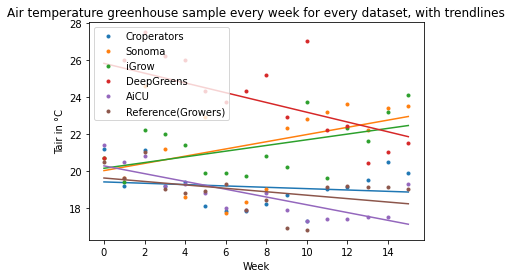

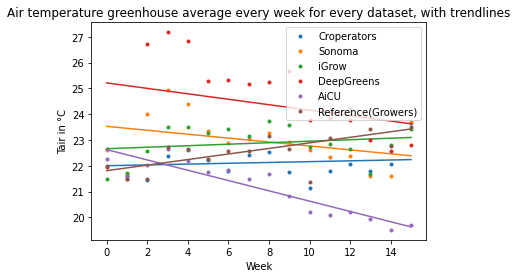

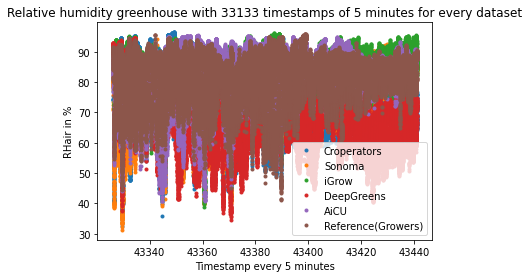

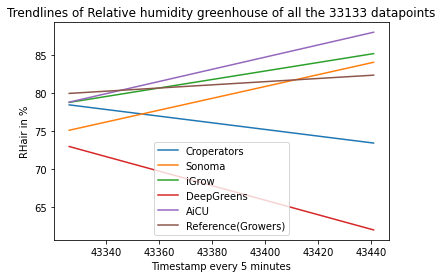

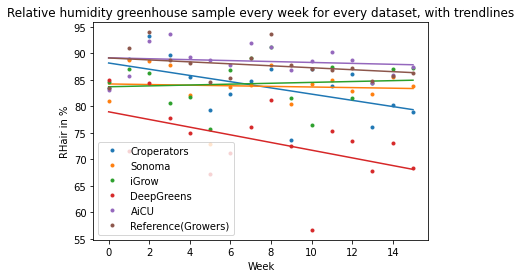

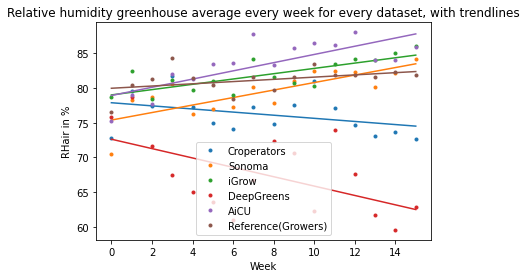

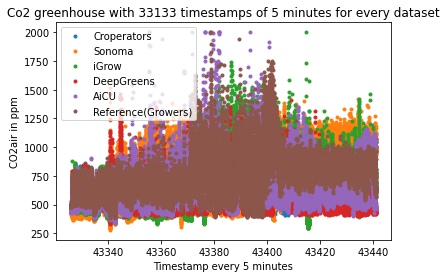

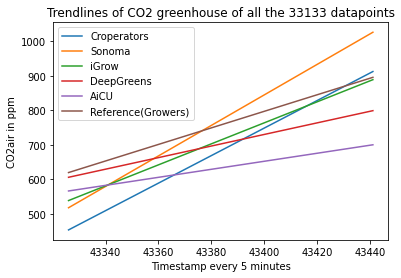

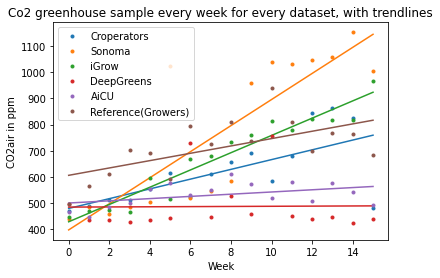

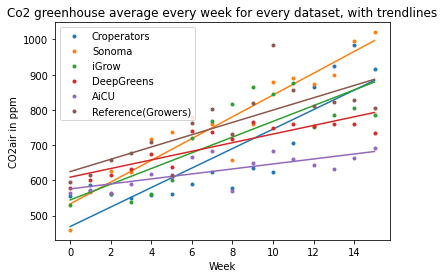

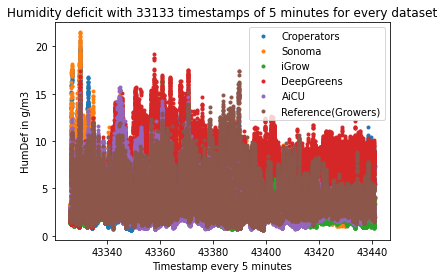

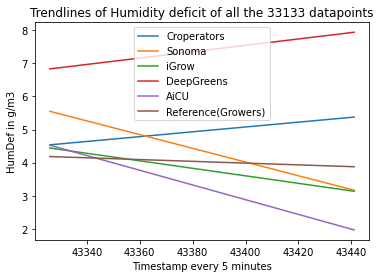

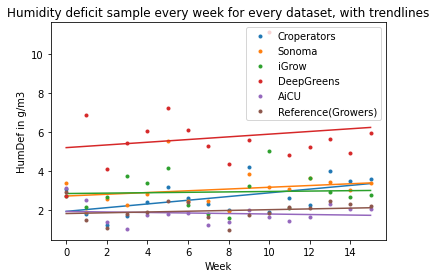

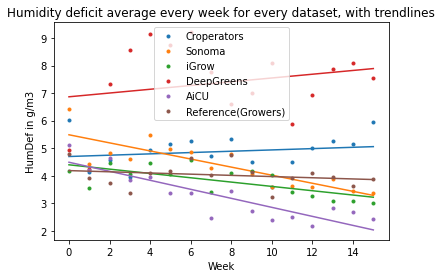

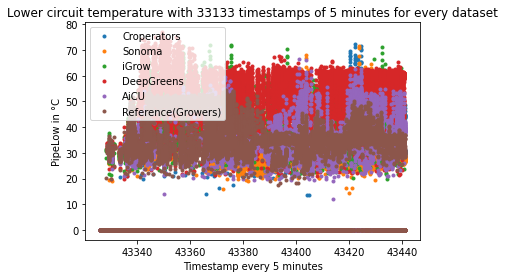

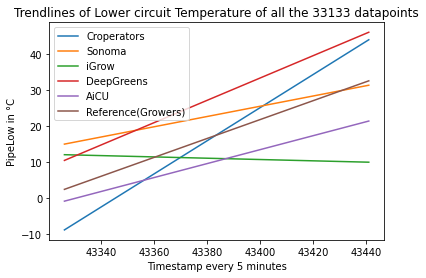

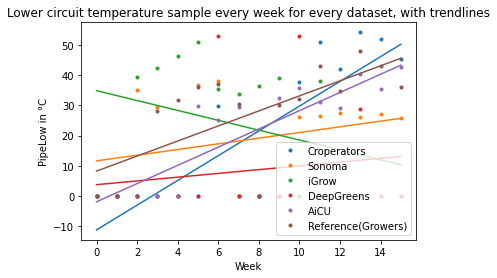

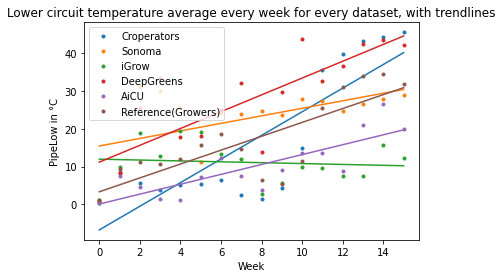

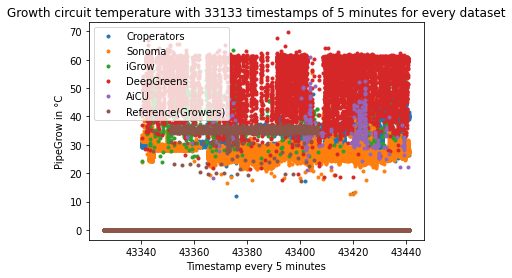

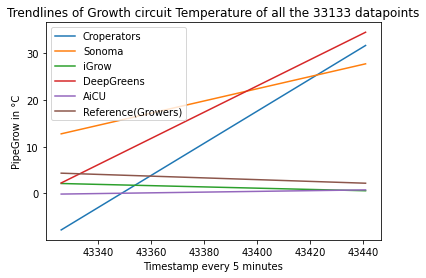

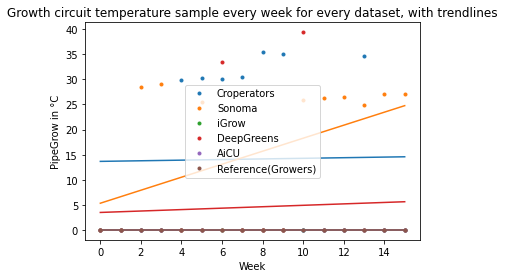

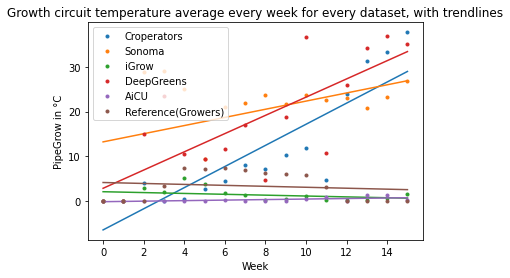

In [6]:
# Plot timeseries.
for key in features_ghclim:
    visualize_time(datasets, key, features_ghclim[key][0], f'{key} in {features_ghclim[key][1]}')

## Vip
The next visualisations will be of the Vip dataset

*Column heading Parameter description Unit Interval Dataset name Type Comments Data collection*
![](https://i.imgur.com/gm6EiUg.png)

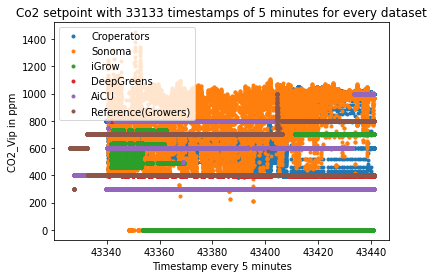

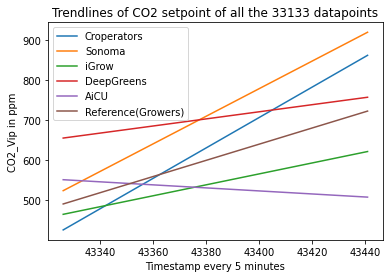

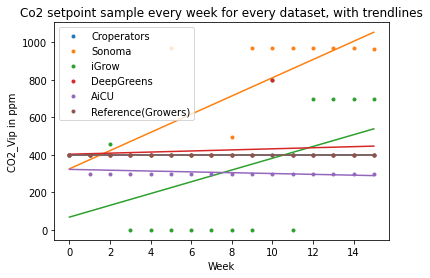

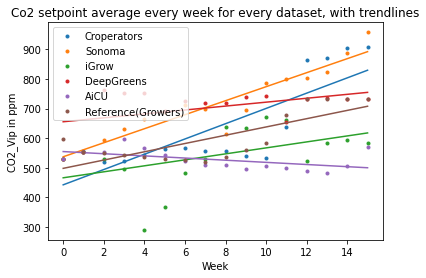

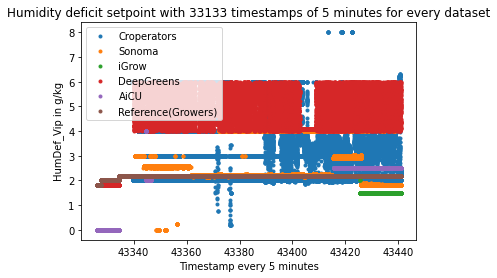

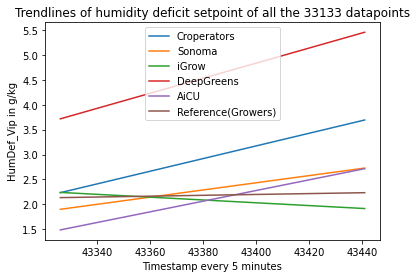

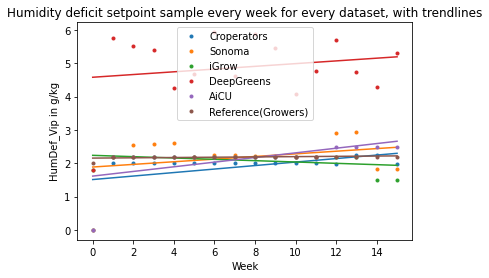

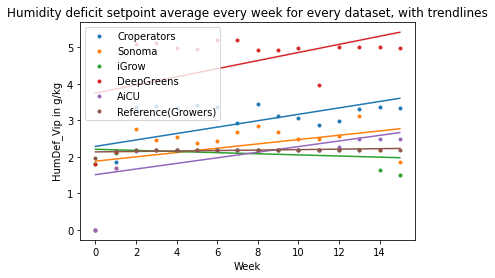

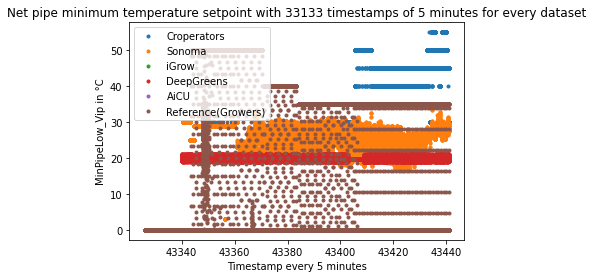

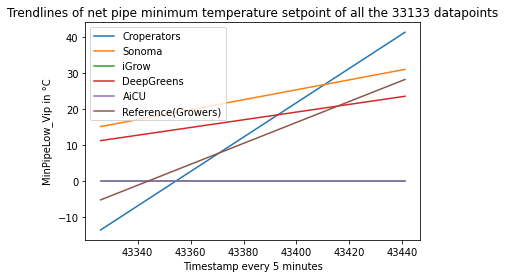

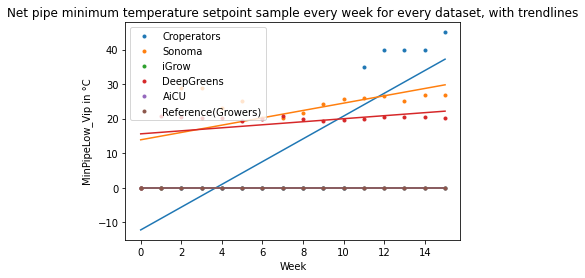

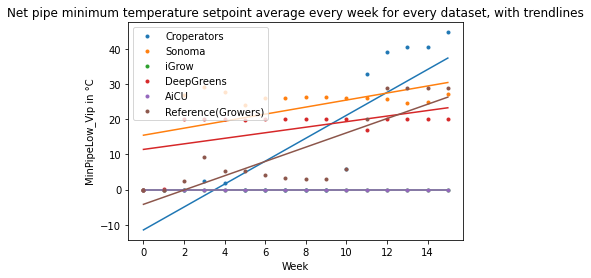

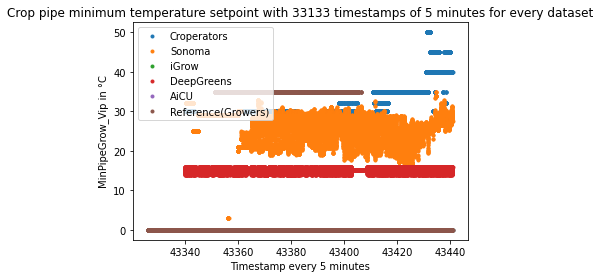

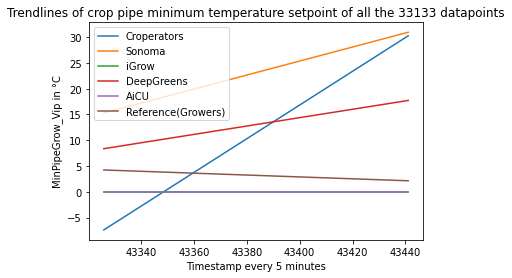

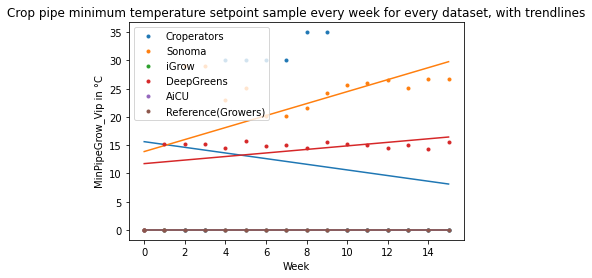

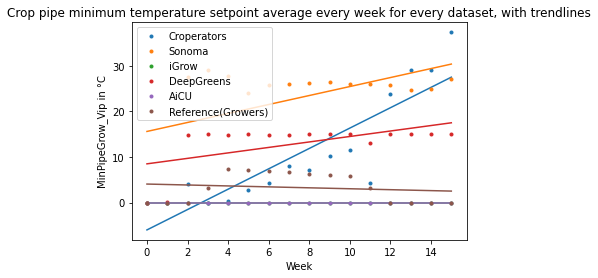

In [7]:
# Plot timeseries.
for key in features_vip:
    visualize_time(data, datasets, key, features_vip[key][0], f'{key} in {features_vip[key][1]}', 'vip', 'time')

# Weekly average

Because this file is with default values the data will not be devided into 'weekly data'. If you would like this option please run the polynomial_fit.ipynb file. The reason the default is not deviding data is because when there is more data in the future this will give better results 

# Polynomial fitting
## On greenhouse climate data versus production A and B

Which degree of polynomial fitting would you like?
2


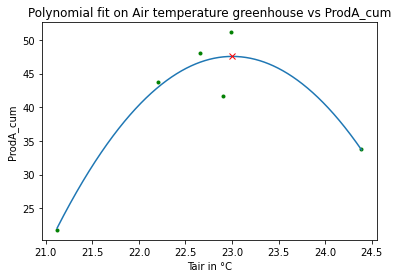

The optimal value(s) according to a polynomial
with a degree of 2: 23.002268890887514.


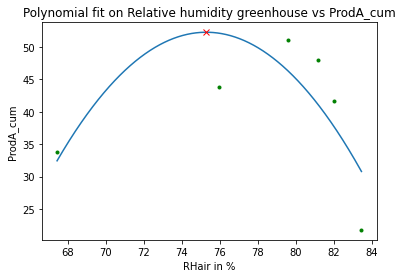

The optimal value(s) according to a polynomial
with a degree of 2: 75.2942364299392.


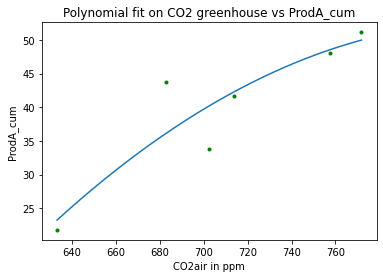

The optimal value(s) according to a polynomial
with a degree of 2: .


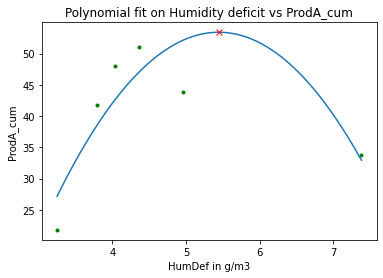

The optimal value(s) according to a polynomial
with a degree of 2: 5.446851858016073.


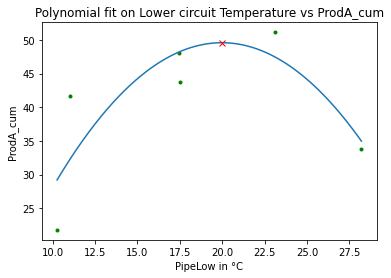

The optimal value(s) according to a polynomial
with a degree of 2: 19.984510568669254.


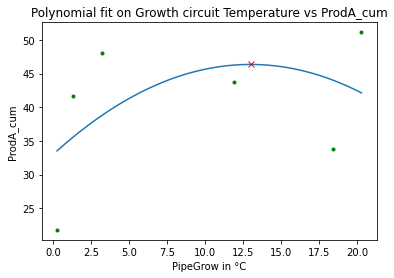

The optimal value(s) according to a polynomial
with a degree of 2: 12.980512805853886.


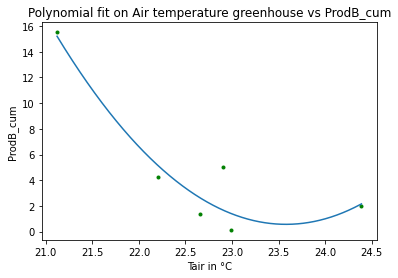

The optimal value(s) according to a polynomial
with a degree of 2: .


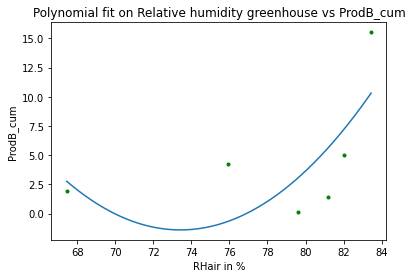

The optimal value(s) according to a polynomial
with a degree of 2: .


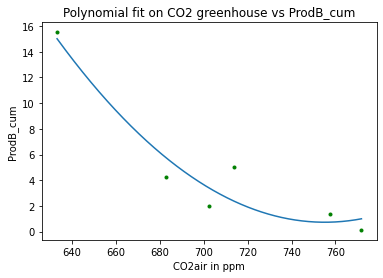

The optimal value(s) according to a polynomial
with a degree of 2: .


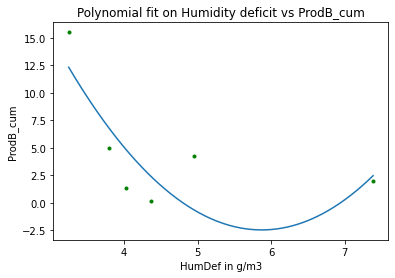

The optimal value(s) according to a polynomial
with a degree of 2: .


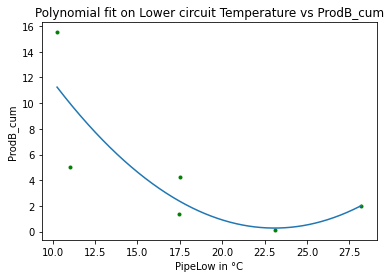

The optimal value(s) according to a polynomial
with a degree of 2: .


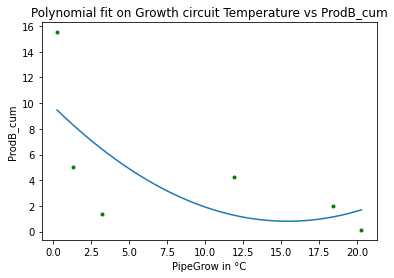

The optimal value(s) according to a polynomial
with a degree of 2: .


In [16]:
def plot_polynome(x,y, degree, x_name, y_name):
    '''
    This function visualizes data and a fitted polynomial. In this function a good 
    fit for a certain degree polynomial will be found. The degree has to be a given
    parameter. x and y are the datapoints and x_name and y_name are the names of this
    datasets.
    '''
    plt.plot(x, y, '.g')
    params = np.polyfit(x,y, degree)
    # The more samples on the linspace, the more accurate the local maxima will be.
    x_polynome = np.linspace(min(x),max(x),1000)
    y_polynome = np.poly1d(params)(x_polynome)
    plt.plot(x_polynome, y_polynome)
    # Find the maximum values.
    peaks, _ = find_peaks(y_polynome, height=0)
    plt.plot(x_polynome[peaks], y_polynome[peaks], 'xr')
    plt.xlabel(f'{x_name} in {features_ghclim[x_name][1]}')
    plt.ylabel(y_name)
    plt.title(f'Polynomial fit on {features_ghclim[x_name][0]} vs {y_name}')
    plt.show()
    print(f'The optimal value(s) according to a polynomial\nwith a degree of {degree}:', end=" ")
    peaks_str = ""
    for val in x_polynome[peaks]:
        peaks_str += f'{val}, '
    print(peaks_str[:-2]+'.')

# Ask for input.
degree = 0
while not 2<=degree<=20:
    try:
        degree = int(input('Which degree of polynomial fitting would you like?\n'))
        if not 2<=degree<=20:
            print('Please chose an integer (a high degree polynomial may overfit)')
    except ValueError:
        print('Please chose an integer (a high degree polynomial may overfit)')
if run == 'Yes':
    for y_name in ['prodA', 'prodB']:
        for x_name in ['CO2air', 'HumDef', 'Tair']:
            x, y = weekly_data[x_name], weekly_data[y_name]
            plot_polynome(x,y, degree, x_name, y_name)
else:
     # Take the average of the ghclim features and the eventual production value of every team.
    plot_data = dict()
    for category in ['ProdA_cum', 'ProdB_cum']:
        for key in features_ghclim:
            feature_point, prod = [], []
            for dataset in datasets:
                feature_point.append(data[dataset]['GHClim'][key].mean())
                prod_df = data[dataset]['prod'][category]
                prod.append(prod_df[prod_df.index[-1]])
            x, y = feature_point, prod
            plot_polynome(x,y, degree, key, category)

# Results
*More results can be found in the [README.md](https://github.com/readmees/erudite2020/blob/master/README.md) and on the webpage mentioned in the start of this file: [readmees.github.io/polynomial_fit.html](https://readmees.github.io/polynomial_fit.html).*

As you can see in the following figure, according to Zheng et al. (2018) the optimal CO growth for three perennial grass species is around 915 ppm. If you fit an 3rd degree polynomial on the automonous greenhouse challenge data you will get a simulair result, +- 947.475264901824 ppm (see figure 2)
![](https://media.springernature.com/full/springer-static/image/art%3A10.1186%2Fs12870-018-1243-3/MediaObjects/12870_2018_1243_Fig1_HTML.gif?as=webp)
Figure 1: Zheng, Y., Li, F., Hao, L., Shedayi, A. A., Guo, L., Ma, C., ... & Xu, M. (2018). The optimal CO 2 concentrations for the growth of three perennial grass species. BMC plant biology, 18(1), 27.
![](https://i.imgur.com/eA9OZZi.png)
Figure 2: Automonous greenhouse challenge data